In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_ok.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1304,3,0,"Zabour, Miss. Thamine",1,22.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1305,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1306,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


In [4]:
# 데이터 x와 정답 y --> 데이터 전처리( cell 50-51 )

# X
# [ 선실등급, 성별, 나이, 부부형제_수, 부모자식_수, 운임 ]
x_cols = ['pclass','sex','age','sibsp','parch','fare']
X = df[x_cols].values
X

# y
y = df['survived'].values
y

# ML 코딩 5단계
# 1. 훈련 데이터와 테스트 데이터를 준비 : train_test_split
#   - Underfiting과 Overfiting을 조심해야함
# 2. ML 알고리즘 선택
# 3. 훈련 : fit
# 4. 평가 : score
# 5. 새로운 데이터로 예측  :predict

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=7) # 재현성(항상 같은 값이 나옴)
X_train

array([[ 1.    ,  0.    , 39.    ,  0.    ,  0.    , 29.7   ],
       [ 1.    ,  0.    , 27.    ,  0.    ,  0.    , 76.7292],
       [ 3.    ,  1.    , 22.    ,  1.    ,  0.    , 24.15  ],
       ...,
       [ 2.    ,  0.    , 34.    ,  0.    ,  0.    , 13.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    , 41.    ,  1.    ,  0.    , 51.8625]])

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
tree = DecisionTreeClassifier(max_depth=6) # hyperparameter tunning
tree.fit(X_train,y_train) # 훈련 과정
print("훈련 점수:",tree.score(X_train, y_train))
print("테스트 점수:",tree.score(X_test,y_test)) 

훈련 점수: 0.8394222599830077
테스트 점수: 0.8320610687022901


In [7]:
# 디카프리오는 살 수 있었나?
# [[3등실, 남 :0, 19살, 형제 x :0, 부모 x :0, 운임 : 10달러]]
dicaprio = [[3,0,19,0,0,10]]
result = tree.predict(dicaprio)
print("결과 : ",result) # [0] ==> 0은 사망..
pct = tree.predict_proba(dicaprio)
print("확률 : ", pct) # [[0.88944724 0.11055276]] ==> [[사망확률, 생존확률]]
print(f"생존확률 : {pct[0][1]*100:.2f}%") #생존확률을 뽑아서 소수점 둘째자리까지 출력


결과 :  [0]
확률 :  [[0.88944724 0.11055276]]
생존확률 : 11.06%


In [8]:
# 여주인공 윈슬릿은?
# [[1등실, 여:1, 17살, 형제:1, 부모:2, 운임:100달러]]
winselt = [[1,1,17,1,2,100]]
result = tree.predict(winselt)
print("결과 : ",result)
if result==0:
   print("사망")
else:
   print("생존")
pct = tree.predict_proba(winselt)
print("확률 : ", pct) # [[0.00787402 0.99212598]] ==> [[사망확률, 생존확률]]
print(f"생존확률 : {pct[0][1]*100:.2f}%")

결과 :  [1]
생존
확률 :  [[0.00787402 0.99212598]]
생존확률 : 99.21%


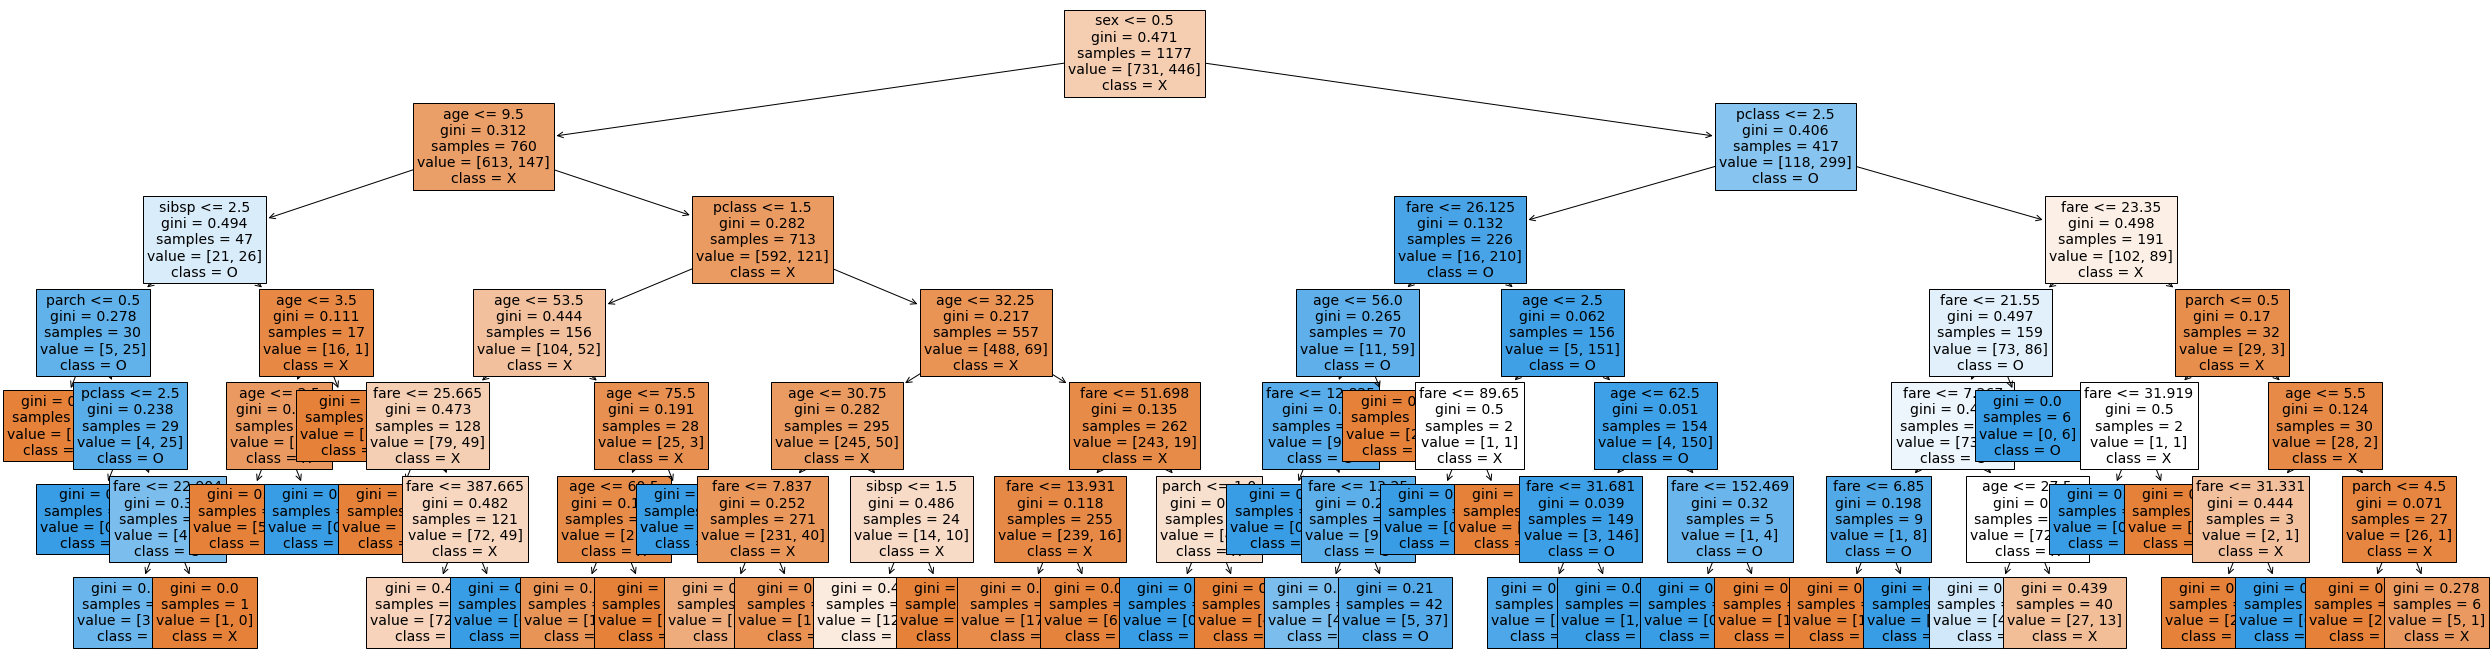

In [9]:
# 설명가능한 인공지능 : XAI
from sklearn.tree import plot_tree
plt.figure(figsize=(44,12))
plot_tree(tree,feature_names=x_cols,class_names=['X','O'],filled=True, fontsize=14)
plt.savefig('tree1.png')
plt.show()